In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

print('Версия pandas:', pd.__version__)

Версия pandas: 2.1.4


# Арифметические и логические операции в pandas

#### План урока
    
#### Часть I
    
#### 1. Операторы в python
       +, -, *, /, //, %, **
#### 2. Арифметические методы структур Series и DataFrame
       add - сложение +
       sub - вычитание -
       mul - умножение *
       div - деление /
       floordiv - целочисленное деление //
       mod - получение остатка от деления %
       pow - возведение в степень **
#### 3. Логические методы структур Series и DataFrame
       any - логическое "ИЛИ"
       all - логическое "И"
       equals - общая быстрая проверка на равенство структур (значений на одинаковых позициях)
       eq - проверка на равенство ==
       ne - проверка на неравенство !=
       le - меньше или равно <=
       lt-  меньше чем <
       ge - больше или равно >=
       gt - больше чем > 
#### Часть II - Методы для отслеживания динамики (изменений) в структурах Series и DataFrame
       diff - построчная разница (также применимо к столбцам)
       pct_change - построчная разница в процентах (также применимо к столбцам)
       compare - наглядное сравнение двух структур 
       sum & cumsum - сумма и кумулятивная (накапливающаяся) сумма
       min & cummin + idmin - минимум и кумулятивный (меняющийся, динамичный) минимум + индексный показатель минимума
       max & cummax + idmax - максимум и кумулятивный (меняющийся, динамичный) максимум + индексный показатель максимума
       prod & cumprod - произведение и кумулятивное (накопительное) произведение значений структуры

# Часть I

## 1. Операторы python

    1. Арифметические операторы
    2. Операторы присваивания
    3. Операторы сравнения
    4. Логические операторы
    5. Операторы тождественности
    6. Операторы принадлежности
    7. Побитовые операторы

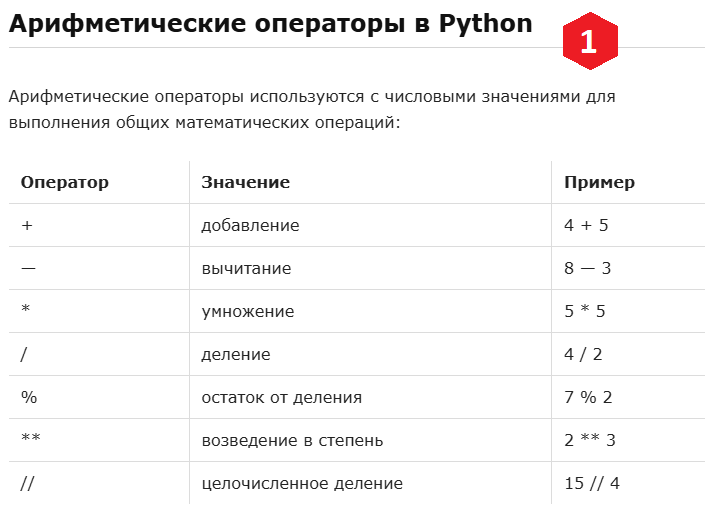

In [2]:
Image('files/operators/arithmetic_operators.png')

#### Пример № 1

In [3]:
# простое деление
print(15/4)
# целочисленное деление
print(15//4)
# 16 делится на 4 без остатка
print(16%4)
# 17 делится на 4 с остатком 1
print(17%4)

3.75
3
0
1


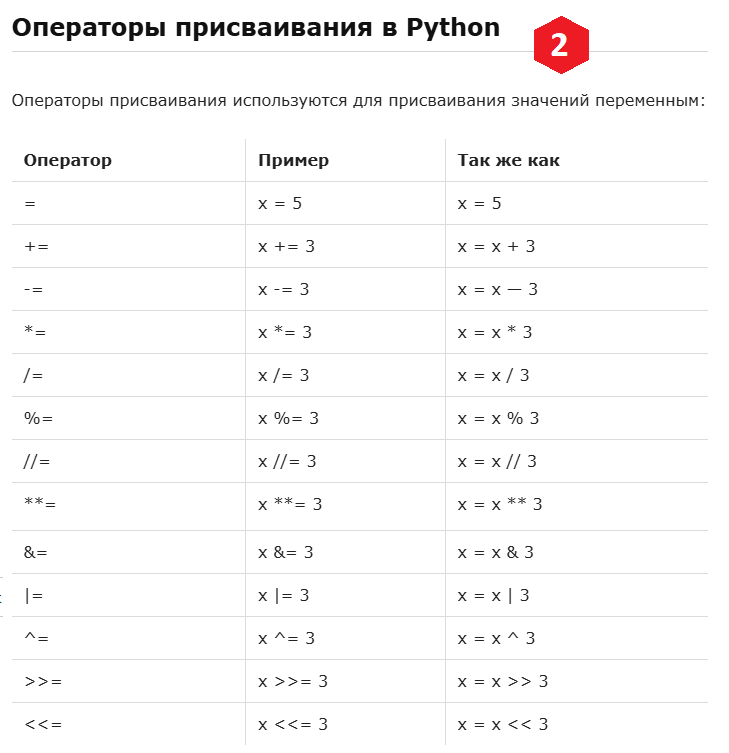

In [4]:
Image('files/operators/assignment_operators.png')

#### Пример № 2

In [5]:
x=5 # переменной x присваиваем значение 5
x+=1 # данное выражение добавляет к x единицу (эквивалентно выражению x=x+1)
print(x)

6


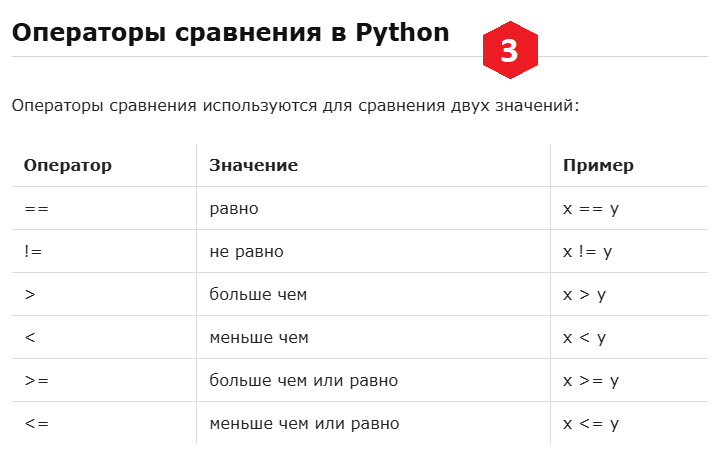

In [6]:
Image('files/operators/сomparison_operators.png')

#### Пример № 3

In [7]:
2>1

True

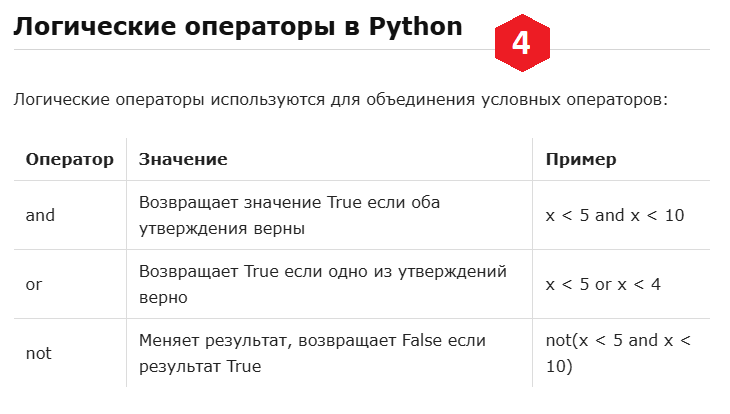

In [8]:
Image('files/operators/logical_or_boolean_operators.png')

#### Пример № 4

In [9]:
# and
(2>1) and (1>3)

False

In [10]:
# or
(2>1) or (1>3)

True

In [11]:
# not
not(1>2)

True

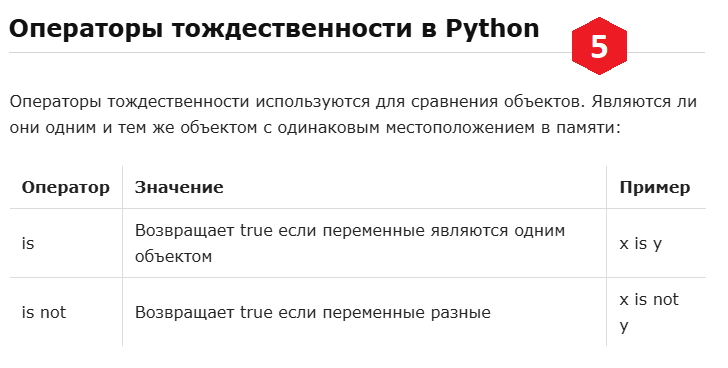

In [12]:
Image('files/operators/identity_operators.png')

#### Пример № 5

In [13]:
x=3
y=x
z=y

print(x is z)
print()
print('Один и тот же id у всех трех объектов (x, y, z):', id(x), id(y), id(z), sep='\n')

True

Один и тот же id у всех трех объектов (x, y, z):
140716734858088
140716734858088
140716734858088


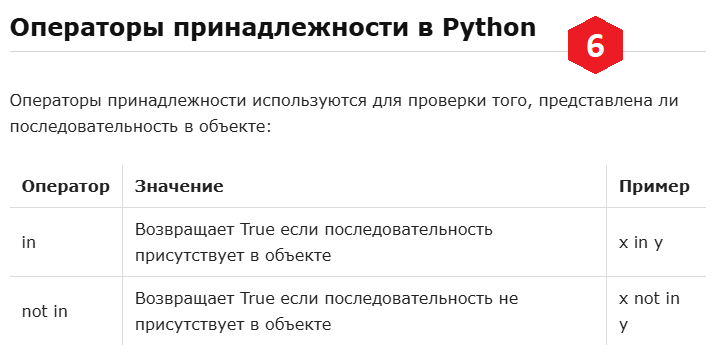

In [14]:
Image('files/operators/membership_operators.png')

#### Пример № 6

In [15]:
'a' in 'and'

True

In [16]:
'ad' in 'and'

False

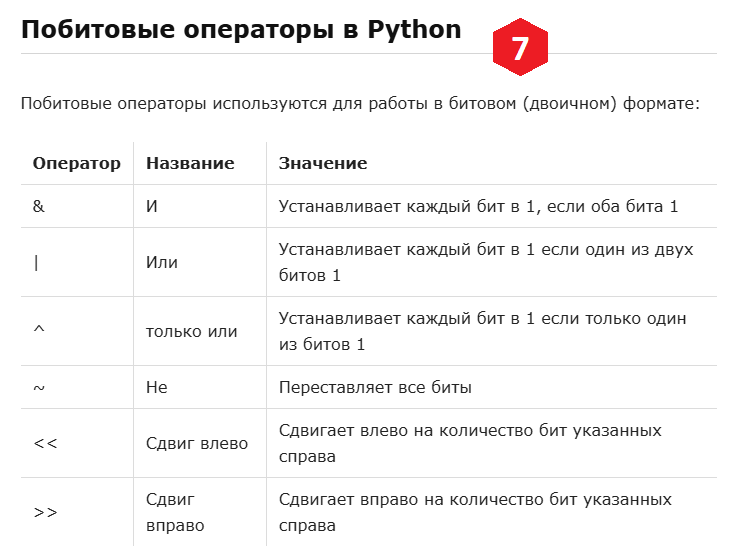

In [17]:
Image('files/operators/bitwise_operators.png')

#### Пример № 7

In [18]:
# ^ - XOR, ИСКЛЮЧАЮЩЕЕ ИЛИ

# 1^1=0
# 1^0=1
# 0^1=1
# 0^0=0

1^1

0

## 2. Арифметические методы структур Series и DataFrame
#### Методы add, sub, mul, div, floordiv, mod, pow 

    Структуры данных pandas можно складывать, вычитать, умножать и делить (поэлементно).

    arithmetic operators: +, -, *, /, //, %, **
    flexible wrappers : add, sub, mul, div, floordiv, mod, pow  
    
    Методы позволяют указывать ось для применения и заполнитель пропусков NaN

Параметры: 
#### other
    скалярное значение, Series, словарь (dict) или DataFrame
_Любая одно- или многоэлементная структура или спископодобный объект_

#### axis
    {0 or 'index', 1 or 'columns'}
_Выбор оси для применения метода_

#### level 
    (int или метка)
_Транслируется по уровню, сопоставляя значения индексов на переданном уровне MultiIndex_

#### fill_value
    float или None, по умолчанию None
_Заполняем этим значением все существующие отсутствующие (NaN) значения и все новые элементы, необходимые для успешного выравнивания DataFrame перед вычислением. Если данные в обоих соответствующих местах DataFrame отсутствуют, результат будет отсутствовать._

In [19]:
# Для начала создадим две структуры DataFrame:
df1 = pd.DataFrame([[10, 20, 30], [40, 50, 60], [5, 10, 15]])
df2 = pd.DataFrame([[5, 15, 25], [15, 25, 35], [10, 15, 20]])
display(df1, df2)

,0,1,2
0,10,20,30
1,40,50,60
2,5,10,15


,0,1,2
0,5,15,25
1,15,25,35
2,10,15,20


## Сложение - DataFrame.add

In [20]:
# складываем одну структуру с другой
df1.add(df2)

,0,1,2
0,15,35,55
1,55,75,95
2,15,25,35


In [21]:
# К элементам структуры можно добавить константу:
df1.add(5)

,0,1,2
0,15,25,35
1,45,55,65
2,10,15,20


## Вычитание - DataFrame.sub

In [22]:
# Вычитание осуществляется с помощью метода sub():
display('df1', df1, 'df2', df2, 
        'df1-df2', df1.sub(df2),
        'df1-7', df1.sub(7))

'df1'

,0,1,2
0,10,20,30
1,40,50,60
2,5,10,15


'df2'

,0,1,2
0,5,15,25
1,15,25,35
2,10,15,20


'df1-df2'

,0,1,2
0,5,5,5
1,25,25,25
2,-5,-5,-5


'df1-7'

,0,1,2
0,3,13,23
1,33,43,53
2,-2,3,8


## Умножение - DataFrame.mul

In [23]:
# Для умножения структур применяется метод mul():
display(df1.mul(df2), 
        df1.mul(2))

,0,1,2
0,50,300,750
1,600,1250,2100
2,50,150,300


,0,1,2
0,20,40,60
1,80,100,120
2,10,20,30


## Деление - DataFrame.div()

In [24]:
# для деления используется метод div():
display(df1.div(df2), # делим поэлементно одну структуру на другую
        df1.div(5)) # делим структуру на 5. В результате - в новой структуре значения с типом данных float

,0,1,2
0,2.000000,1.333333,1.200000
1,2.666667,2.000000,1.714286
2,0.500000,0.666667,0.750000


,0,1,2
0,2.0,4.0,6.0
1,8.0,10.0,12.0
2,1.0,2.0,3.0


## DataFrame.truediv & DataFrame.floordiv

In [25]:
# для деления также могут использоваться:
display('результат обычного деления df1 на 5:',
        df1.truediv(5), # эквивалентно df1 / 5 
        'результат целочисленного деления df1 на 5:',
        df1.floordiv(5), # эквивалентно df1 // 5
        'результат целочисленного деления df1 а 3:',
        df1.floordiv(3)) # эквивалентно df1 // 3

'результат обычного деления df1 на 5:'

,0,1,2
0,2.0,4.0,6.0
1,8.0,10.0,12.0
2,1.0,2.0,3.0


'результат целочисленного деления df1 на 5:'

,0,1,2
0,2,4,6
1,8,10,12
2,1,2,3


'результат целочисленного деления df1 а 3:'

,0,1,2
0,3,6,10
1,13,16,20
2,1,3,5


## Получение остатка от деления - DataFrame.mod 

In [26]:
display('получаем остаток от деления структуры df1 на константу (на 4)',
        df1.mod(4),
        'получаем остаток от деления структуры df1 на структуру df2:',
        df1.mod(df2))

'получаем остаток от деления структуры df1 на константу (на 4)'

,0,1,2
0,2,0,2
1,0,2,0
2,1,2,3


'получаем остаток от деления структуры df1 на структуру df2:'

,0,1,2
0,0,5,5
1,10,0,25
2,5,10,15


## Возведение в степень - DataFrame.pow

In [27]:
display(df1, 'возведение структуры df1 в квадрат:', df1.pow(2))

,0,1,2
0,10,20,30
1,40,50,60
2,5,10,15


'возведение структуры df1 в квадрат:'

,0,1,2
0,100,400,900
1,1600,2500,3600
2,25,100,225


## Использование параметров axis и fill_value

    axis по умолчанию 1, операции проходят по строкам
    Если указать axis=0, операции будут проходить по столбцам

In [28]:
display(df1,
        df1.div([5, 10, 5])) # по умолчанию деление происходит построчно [10, 20, 30] / [5, 10, 5] и т.д.

,0,1,2
0,10,20,30
1,40,50,60
2,5,10,15


,0,1,2
0,2.0,2.0,6.0
1,8.0,5.0,12.0
2,1.0,1.0,3.0


In [29]:
display(df1,
        df1.div([5, 10, 5], axis=0)) # деление происходит по столбцам [10, 40, 5] / [5, 10, 5] и т.д.

,0,1,2
0,10,20,30
1,40,50,60
2,5,10,15


,0,1,2
0,2.0,4.0,6.0
1,4.0,5.0,6.0
2,1.0,2.0,3.0


### Аргумент fill_value используется для заполнения образовавшихся пропусков NaN

In [30]:
display(df1, 
        df1.mul([np.nan, 5, 5]), # в результате умножения двух структур образовались NaN в 1 столбце
        df1.add([np.nan, 5, 5])) # в результате сложения двух структур образовались NaN в 1 столбце

,0,1,2
0,10,20,30
1,40,50,60
2,5,10,15


,0,1,2
0,NaN,100.0,150.0
1,NaN,250.0,300.0
2,NaN,50.0,75.0


,0,1,2
0,NaN,25.0,35.0
1,NaN,55.0,65.0
2,NaN,15.0,20.0


In [31]:
# заполняем нулями NaN

# в результате умножения в 1 столбце теперь фигурируют нули

# в результате сложения больше нет пропусков в 1-м столбце, 
# как если бы мы просто прибавили ноль к каждому из значений 1 столбца структуры df1

display(df1, 
        df1.mul([np.nan, 5, 5], fill_value=0),
        df1.add([np.nan, 5, 5], fill_value=0))

,0,1,2
0,10,20,30
1,40,50,60
2,5,10,15


,0,1,2
0,0.0,100.0,150.0
1,0.0,250.0,300.0
2,0.0,50.0,75.0


,0,1,2
0,10.0,25.0,35.0
1,40.0,55.0,65.0
2,5.0,15.0,20.0


#### Пример с индексацией окладов и премий сотрудников

In [32]:
df_work = pd.DataFrame({'оклад': [150000, 140000, 145000],
                   'премия': [25000, 35000, 15000]},
                  index=[1001, 1002, 1003])
df_work.index.name='id_сотрудника'
df_work

,оклад,премия
id_сотрудника,,
1001,150000,25000
1002,140000,35000
1003,145000,15000


In [33]:
df_work.mul({'оклад': 1.25, 'премия': 2})

,оклад,премия
id_сотрудника,,
1001,187500.0,50000.0
1002,175000.0,70000.0
1003,181250.0,30000.0


In [34]:
# индексация зп и премии по каждому отдельному сотруднику
display(df_work,
        df_work.mul({1001: 1.25, 1002: 1.18, 1003: 1.15}, axis='index')) # axis=0

,оклад,премия
id_сотрудника,,
1001,150000,25000
1002,140000,35000
1003,145000,15000


,оклад,премия
id_сотрудника,,
1001,187500.0,31250.0
1002,165200.0,41300.0
1003,166750.0,17250.0


## 3. Логические операции

    DataFrame.all

    DataFrame.any

    DataFrame.equals & DataFrame.eq

In [35]:
df_cr = df2.copy()
df_cr.columns=['col_1', 'col_2', 'col_3']
df_cr.index=['row_1', 'row_2', 'row_3']
df_cr

,col_1,col_2,col_3
row_1,5,15,25
row_2,15,25,35
row_3,10,15,20


In [36]:
# Определим элементы структуры df_cr, значения которые больше 25:
df_cr > 25

,col_1,col_2,col_3
row_1,False,False,False
row_2,False,False,True
row_3,False,False,False


## Методы any (логическое ИЛИ) & all (логическое И)

In [37]:
# any по столбцам:
(df_cr > 25).any()

col_1    False
col_2    False
col_3     True
dtype: bool

In [38]:
# any по строкам:
(df_cr > 25).any(axis=1)

row_1    False
row_2     True
row_3    False
dtype: bool

In [39]:
# all по столбцам:
(df_cr > 25).all()

col_1    False
col_2    False
col_3    False
dtype: bool

In [40]:
# all по строкам:
(df_cr > 25).all(axis=1)

row_1    False
row_2    False
row_3    False
dtype: bool

## Сравнение структур DataFrame между собой

In [41]:
# создаем еще одну структуру DataFrame
df3 = pd.DataFrame([[5, 25, 35], [10, 25, 20], [15, 25, 20]])
df3

,0,1,2
0,5,25,35
1,10,25,20
2,15,25,20


## DataFrame.eq & оператор '=='

In [42]:
# можно сравнивать каждый элемент структуры с некоторым константным значением:
df3 == 20

,0,1,2
0,False,False,False
1,False,False,True
2,False,False,True


In [43]:
display(df2, 
        df2 == df3,
        df2.eq(df3)) # результат такой же, как и при использовании оператора ==

,0,1,2
0,5,15,25
1,15,25,35
2,10,15,20


,0,1,2
0,True,False,False
1,False,True,False
2,False,False,True


,0,1,2
0,True,False,False
1,False,True,False
2,False,False,True


## DataFrame.equals & оператор is

In [44]:
# создаем копию датафрейма df2 с другим id
# в этих структурах совпадают только значения (values)
df2_2=df2.copy()
print('id структуры df2:', id(df2), '\n' 'id структуры df2_2:', id(df2_2))

id структуры df2: 2709741374672 
id структуры df2_2: 2709758294544


In [45]:
# на одних и тех же позициях стоят одни и те же значения - Получаем True
print('проверка на равенство двух структур df2 и df2_2 (равенство значений на одних и тех же позициях):\n',
      df2.equals(df2_2))
# сравнение расположения двух объектов в памяти
print('проверка на тождественность самих структур (id) - df2 is df2_2:\n', 
      df2 is df2_2)

проверка на равенство двух структур df2 и df2_2 (равенство значений на одних и тех же позициях):
 True
проверка на тождественность самих структур (id) - df2 is df2_2:
 False


In [46]:
# Создаем копию с тем же id, используя оператор присваивания
df2_the_same_id = df2
# при проверке id совпадают
print('id структуры df2:', id(df2), '\n' 'id структуры df2_the_same_id:', id(df2_the_same_id),'\n')
print(df2_the_same_id is df2)

id структуры df2: 2709741374672 
id структуры df2_the_same_id: 2709741374672 

True


## Методы сравнения

#### DataFrame.eq - equal - проверка на равенство ==
#### DataFrame.ne - not equal - проверка на неравенство !=
#### DataFrame.le - less than or equal - меньше или равно <=
#### DataFrame.lt -  less than - меньше чем <
#### DataFrame.ge - greater than or equal - больше или равно >=
#### DataFrame.gt - greater than - больше чем > 

In [47]:
students_2023= pd.DataFrame([[70,74,83,80,73],[75,79,90,84,91],[70,75,83,81,75]],
                             columns=['алгебра','геометрия','русский язык','литература','английский язык'], 
                            index=['0001', '0002', '0003'])
students_2024=pd.DataFrame([[68,72,88,83,73],[77,74,93,84,82],[70,75,83,81,75]],
                             columns=['алгебра','геометрия','русский язык','литература','английский язык'], 
                            index=['0001', '0002', '0003'])
students_2023.index.name='id_ученика'
students_2024.index.name='id_ученика'
display(students_2023, students_2024)

,алгебра,геометрия,русский язык,литература,английский язык
id_ученика,,,,,
0001,70,74,83,80,73
0002,75,79,90,84,91
0003,70,75,83,81,75


,алгебра,геометрия,русский язык,литература,английский язык
id_ученика,,,,,
0001,68,72,88,83,73
0002,77,74,93,84,82
0003,70,75,83,81,75


#### Сравниваем между собой результаты учеников в 2023 и 2024 году

In [48]:
display('equal (равно): =', students_2023.eq(students_2024),
        'Not equal (не равно): !=',students_2023.ne(students_2024),
        'Less than or equal (меньше или равно): <=', students_2023.le(students_2024),
        'Less than (меньше чем): <', students_2023.lt(students_2024),
        'Greater than or equal (больше или равно): >=', students_2023.ge(students_2024),
        'Greater than (больше чем): >', students_2023.gt(students_2024))

'equal (равно): ='

,алгебра,геометрия,русский язык,литература,английский язык
id_ученика,,,,,
0001,False,False,False,False,True
0002,False,False,False,True,False
0003,True,True,True,True,True


'Not equal (не равно): !='

,алгебра,геометрия,русский язык,литература,английский язык
id_ученика,,,,,
0001,True,True,True,True,False
0002,True,True,True,False,True
0003,False,False,False,False,False


'Less than or equal (меньше или равно): <='

,алгебра,геометрия,русский язык,литература,английский язык
id_ученика,,,,,
0001,False,False,True,True,True
0002,True,False,True,True,False
0003,True,True,True,True,True


'Less than (меньше чем): <'

,алгебра,геометрия,русский язык,литература,английский язык
id_ученика,,,,,
0001,False,False,True,True,False
0002,True,False,True,False,False
0003,False,False,False,False,False


'Greater than or equal (больше или равно): >='

,алгебра,геометрия,русский язык,литература,английский язык
id_ученика,,,,,
0001,True,True,False,False,True
0002,False,True,False,True,True
0003,True,True,True,True,True


'Greater than (больше чем): >'

,алгебра,геометрия,русский язык,литература,английский язык
id_ученика,,,,,
0001,True,True,False,False,False
0002,False,True,False,False,True
0003,False,False,False,False,False


#### Сравниваем результаты учеников 2024 года с проходным баллом по соответствующему предмету

In [49]:
s_pass = pd.Series([71, 71, 82, 80, 60], index=['алгебра','геометрия','русский язык','литература','английский язык'])
s_pass

алгебра            71
геометрия          71
русский язык       82
литература         80
английский язык    60
dtype: int64

In [50]:
# используем метод ge (больше и равно)
# в результате только один ученик получил достаточное количество баллов
# ученики 001 и 0003 не прошли по баллам по алгебре
display(students_2024, students_2024.ge(s_pass))

,алгебра,геометрия,русский язык,литература,английский язык
id_ученика,,,,,
0001,68,72,88,83,73
0002,77,74,93,84,82
0003,70,75,83,81,75


,алгебра,геометрия,русский язык,литература,английский язык
id_ученика,,,,,
0001,False,True,True,True,True
0002,True,True,True,True,True
0003,False,True,True,True,True


#### Сравниваем результаты учеников 2024 года с их собственным средним баллом (по всем предметам)

In [51]:
s_res_1=students_2024.mean(axis=1)
s_res_1

id_ученика
0001    76.8
0002    82.0
0003    76.8
dtype: float64

In [52]:
# мы видим, что индивидуальный результат по алгебре и геометрии ниже общего среднего балла каждого отдельного ученика
# только у одного ученика результат по английскому языку равен или превышает его общий средний балл
display(students_2024, 
        students_2024.ge(s_res_1, axis=0)) 

,алгебра,геометрия,русский язык,литература,английский язык
id_ученика,,,,,
0001,68,72,88,83,73
0002,77,74,93,84,82
0003,70,75,83,81,75


,алгебра,геометрия,русский язык,литература,английский язык
id_ученика,,,,,
0001,False,False,True,True,False
0002,False,False,True,True,True
0003,False,False,True,True,False


#### Сравниваем результаты учеников 2024 года со средним баллом по соответствующему предмету

In [53]:
# получаем серию со средним баллом по каждому предмету
s_res_2=students_2024.mean()
s_res_2

алгебра            71.666667
геометрия          73.666667
русский язык       88.000000
литература         82.666667
английский язык    76.666667
dtype: float64

In [54]:
#  только ученик с id 002 имеет по каждому из предметов результат равный или больший, чем средний по соответствующему предмету. 
display(students_2024, 
        students_2024.ge(s_res_2))

,алгебра,геометрия,русский язык,литература,английский язык
id_ученика,,,,,
0001,68,72,88,83,73
0002,77,74,93,84,82
0003,70,75,83,81,75


,алгебра,геометрия,русский язык,литература,английский язык
id_ученика,,,,,
0001,False,False,True,True,False
0002,True,True,True,True,True
0003,False,True,False,False,False


# Арифметические и логические операции в pandas

# Часть II 

## Методы для отслеживания динамики (изменений) в структурах Series и DataFrame

    DataFrame.compare
    DataFrame.diff
    DataFrame.pct_change
    DataFrame.cummin
    DataFrame.cummax
    DataFrame.cumprod

## Метод compare 
#### для наглядного сравнения двух структур

In [55]:
# создадим две серии с результатами тестирования одного и того же ученика в 2023 и в 2024 году

s_2023 = pd.Series([70,74,83,80,73], index=['алгебра','геометрия','русский язык','литература','английский язык'],
                   name='2023_results')
s_2024 = pd.Series([68,72,88,83,73], index=['алгебра','геометрия','русский язык','литература','английский язык'],
                  name='2024_results')

display(s_2023, s_2024)

алгебра            70
геометрия          74
русский язык       83
литература         80
английский язык    73
Name: 2023_results, dtype: int64

алгебра            68
геометрия          72
русский язык       88
литература         83
английский язык    73
Name: 2024_results, dtype: int64

In [56]:
# в результате нет данных по английскому языку
res_com=s_2023.compare(s_2024)
res_com

,self,other
алгебра,70.0,68.0
геометрия,74.0,72.0
русский язык,83.0,88.0
литература,80.0,83.0


### Аргументы keep_shape & keep_equal & result_names

#### keep_shape - bool, по умолчанию False
    Если True, то сохраняются все строки и столбцы. В противном случае сохраняются только те, которые имеют разные значения

#### keep_equal - bool, по умолчанию False
    Если True, то в результате сохраняются равные значения. В противном случае равные значения отображаются как NaN

#### result_names - tuple (кортеж), по умолчанию (‘self’, ‘other’)
    Устанавливаем имена источников (датафреймов) в сравнительной таблице (кортеж из двух элементов)

In [57]:
# сохраняем форму результирующей структуры
s_2023.compare(s_2024, keep_shape=True)

,self,other
алгебра,70.0,68.0
геометрия,74.0,72.0
русский язык,83.0,88.0
литература,80.0,83.0
английский язык,NaN,NaN


In [58]:
# сохраняем форму результирующей структуры и сами значения
s_2023.compare(s_2024, keep_shape=True, keep_equal=True)

,self,other
алгебра,70,68
геометрия,74,72
русский язык,83,88
литература,80,83
английский язык,73,73


In [59]:
# сохраняем результат в переменную, даем названия колонкам результата
res_com_keep=s_2023.compare(s_2024, keep_equal=True, keep_shape=True, result_names=(2023, 2024))
res_com_keep

,2023,2024
алгебра,70,68
геометрия,74,72
русский язык,83,88
литература,80,83
английский язык,73,73


#### Далее мы можем применить к полученному результату еще какой-нибудь метод 
#### Например, мы можем сравнить полученные результаты с проходными баллами в серии s_pass

In [60]:
display(s_pass, # смотрим на проходные баллы
        res_com_keep.ge(s_pass, axis=0)) # выясняем, какие результаты выше или равны проходным

алгебра            71
геометрия          71
русский язык       82
литература         80
английский язык    60
dtype: int64

,2023,2024
алгебра,False,False
геометрия,True,True
русский язык,True,True
литература,True,True
английский язык,True,True


## DataFrame.compare()

In [61]:
display(students_2023, students_2024,
        # производим сравнение результатов
# прописываем аргументы keep_shape, keep_equal, result_names
        students_2023.compare(students_2024, keep_shape=True, keep_equal=True, result_names=(2023, 2024)))

,алгебра,геометрия,русский язык,литература,английский язык
id_ученика,,,,,
0001,70,74,83,80,73
0002,75,79,90,84,91
0003,70,75,83,81,75


,алгебра,геометрия,русский язык,литература,английский язык
id_ученика,,,,,
0001,68,72,88,83,73
0002,77,74,93,84,82
0003,70,75,83,81,75


алгебра      геометрия      русский язык      литература       \
              2023 2024      2023 2024         2023 2024       2023 2024   
id_ученика                                                                 
0001            70   68        74   72           83   88         80   83   
0002            75   77        79   74           90   93         84   84   
0003            70   70        75   75           83   83         81   81   

           английский язык       
                      2023 2024  
id_ученика                       
0001                    73   73  
0002                    91   82  
0003                    75   75

### Аргумент align_axis (по умолчанию - столбцы)

#### align_axis{0 или 'index', 1 или 'columns'}, по умолчанию 1
    Определяем, по какой оси выравнивать сравнение.

    0, или 'index' 
    Результирующие различия выравниваются по вертикали со строками, построенными поочередно от self и от other.

    1, или 'columns' 
    Полученные различия выравниваются по горизонтали со столбцами, построенными поочередно от self и от other.

In [62]:
# используем вертикальное выравнивание
students_2023.compare(students_2024, align_axis=0, 
                      keep_shape=True, keep_equal=True, result_names=(2024, 2025))

алгебра  геометрия  русский язык  литература  английский язык
id_ученика                                                                    
0001       2024       70         74            83          80               73
           2025       68         72            88          83               73
0002       2024       75         79            90          84               91
           2025       77         74            93          84               82
0003       2024       70         75            83          81               75
           2025       70         75            83          81               75

## Метод diff
#### Посчитать разницу каждого текущего значения с предыдущим в одной структуре

#### Пример с изменением веса в течение года (12 измерений)

In [63]:
s_weight_1 = pd.Series([75,75,74,73,73,71,70,70,68,69,65,66], 
                       index=['январь','февраль','март','апрель','май','июнь',
                              'июль','август','сентябрь','октябрь','ноябрь','декабрь'])
s_weight_1

январь      75
февраль     75
март        74
апрель      73
май         73
июнь        71
июль        70
август      70
сентябрь    68
октябрь     69
ноябрь      65
декабрь     66
dtype: int64

In [64]:
s_weight_1.diff()

январь      NaN
февраль     0.0
март       -1.0
апрель     -1.0
май         0.0
июнь       -2.0
июль       -1.0
август      0.0
сентябрь   -2.0
октябрь     1.0
ноябрь     -4.0
декабрь     1.0
dtype: float64

In [65]:
# в среднем в месяц вес уменьшался на 818 гр.
s_weight_1.diff().mean().round(3)

-0.818

## Метод pct_change()
#### Посчитать ту же разницу, только в процентах 

In [66]:
(s_weight_1.pct_change()*100).round(3)

январь        NaN
февраль     0.000
март       -1.333
апрель     -1.351
май         0.000
июнь       -2.740
июль       -1.408
август      0.000
сентябрь   -2.857
октябрь     1.471
ноябрь     -5.797
декабрь     1.538
dtype: float64

#### Пример с курсом валют 

In [67]:
aud=pd.Series([53.5405, 52.6669, 51.9574, 53.3319, 53.8574, 54.6566], 
             index=pd.to_datetime(['21.03.2025','20.03.2025', '19.03.2025', '18.03.2025', '15.03.2025', '14.03.2025'], 
                                  dayfirst=True)) 
# курс австралийского доллара
print(aud)
# посмотреть изменение курса в обратном порядке (с 14 по 21 марта) - применяем sort_index()
print()
aud.sort_index(inplace=True)
print(aud)

2025-03-21    53.5405
2025-03-20    52.6669
2025-03-19    51.9574
2025-03-18    53.3319
2025-03-15    53.8574
2025-03-14    54.6566
dtype: float64

2025-03-14    54.6566
2025-03-15    53.8574
2025-03-18    53.3319
2025-03-19    51.9574
2025-03-20    52.6669
2025-03-21    53.5405
dtype: float64


In [68]:
# отслеживаем изменения
aud.diff()

2025-03-14       NaN
2025-03-15   -0.7992
2025-03-18   -0.5255
2025-03-19   -1.3745
2025-03-20    0.7095
2025-03-21    0.8736
dtype: float64

In [69]:
# отслеживаем изменения в процентах
(aud.pct_change()*100).round(3)

2025-03-14      NaN
2025-03-15   -1.462
2025-03-18   -0.976
2025-03-19   -2.577
2025-03-20    1.366
2025-03-21    1.659
dtype: float64

In [70]:
# Создадим структру DataFrame с курсами двух валют - американского и австралийского доллара
aud=pd.DataFrame([53.5405, 52.6669, 51.9574, 53.3319, 53.8574, 54.6566],
                 index=pd.to_datetime(['21.03.2025','20.03.2025', '19.03.2025', '18.03.2025', '15.03.2025', '14.03.2025'],
                                      dayfirst=True), columns=['aud'])
usd=pd.DataFrame([84.3955, 82.8487, 81.5018, 84.3059, 85.5694, 86.6190],
                 index=pd.to_datetime(['21.03.2025','20.03.2025', '19.03.2025', '18.03.2025', '15.03.2025', '14.03.2025'],
                                      dayfirst=True), columns=['usd'])

df_aud_usd=pd.concat([aud,usd], axis=1) # объединяем две структуры DataFrame
                                  
df_aud_usd.sort_index(inplace=True) # сохраняем сортировку по дате (с 14 по 21 марта 2025 г.)
df_aud_usd

,aud,usd
2025-03-14,54.6566,86.6190
2025-03-15,53.8574,85.5694
2025-03-18,53.3319,84.3059
2025-03-19,51.9574,81.5018
2025-03-20,52.6669,82.8487
2025-03-21,53.5405,84.3955


In [71]:
# отслеживаем ежедневные изменения в курсе двух валют одновременно
df_aud_usd.diff()

,aud,usd
2025-03-14,NaN,NaN
2025-03-15,-0.7992,-1.0496
2025-03-18,-0.5255,-1.2635
2025-03-19,-1.3745,-2.8041
2025-03-20,0.7095,1.3469
2025-03-21,0.8736,1.5468


In [72]:
# отслеживаем изменение курса валют в процентах
(df_aud_usd.pct_change()*100).round(3)

,aud,usd
2025-03-14,NaN,NaN
2025-03-15,-1.462,-1.212
2025-03-18,-0.976,-1.477
2025-03-19,-2.577,-3.326
2025-03-20,1.366,1.653
2025-03-21,1.659,1.867


## DataFrame.diff (по умолчанию: periods=1, axis=0)

In [73]:
# если нам нужно отследить изменение в строке, а не в столбце, используем аргумент axis=1
df_2_aud_usd=df_aud_usd.T
df_2_aud_usd

,2025-03-14,2025-03-15,2025-03-18,2025-03-19,2025-03-20,2025-03-21
aud,54.6566,53.8574,53.3319,51.9574,52.6669,53.5405
usd,86.6190,85.5694,84.3059,81.5018,82.8487,84.3955


In [74]:
display('отслеживаем ежедневную разницу курса валют (по строке):',
        df_2_aud_usd.diff(axis=1),
        'отслеживаем изменение курса валют в процентах (по строке):',
        (df_2_aud_usd.pct_change(axis=1)*100).round(3))

'отслеживаем ежедневную разницу курса валют (по строке):'

,2025-03-14,2025-03-15,2025-03-18,2025-03-19,2025-03-20,2025-03-21
aud,NaN,-0.7992,-0.5255,-1.3745,0.7095,0.8736
usd,NaN,-1.0496,-1.2635,-2.8041,1.3469,1.5468


'отслеживаем изменение курса валют в процентах (по строке):'

,2025-03-14,2025-03-15,2025-03-18,2025-03-19,2025-03-20,2025-03-21
aud,NaN,-1.462,-0.976,-2.577,1.366,1.659
usd,NaN,-1.212,-1.477,-3.326,1.653,1.867


#### Можно смотреть на изменения (разницу курса) за 2 рабочих дня, если поставить аргумент periods=2
#### Это значит, что алгоритм в рассчете будет учитывать значение на две строки выше (а не на одну строку, как установлено по умолчанию)

In [75]:
# Можно смотреть на изменения (разницу курса) за 2 рабочих дня, если поставить аргумент periods=2
display(df_aud_usd,
        df_aud_usd.diff(periods=2))
# 53.3319 (показатель 14.03.2025) - 54.6566 (показатель 18.03.2025) = -1.3247 составляет разница для usd
# 86.6190 (показатель 14.03.2025) - 84.3059 (показатель 18.03.2025) = -2.3131 составляет разница для aud

,aud,usd
2025-03-14,54.6566,86.6190
2025-03-15,53.8574,85.5694
2025-03-18,53.3319,84.3059
2025-03-19,51.9574,81.5018
2025-03-20,52.6669,82.8487
2025-03-21,53.5405,84.3955


,aud,usd
2025-03-14,NaN,NaN
2025-03-15,NaN,NaN
2025-03-18,-1.3247,-2.3131
2025-03-19,-1.9000,-4.0676
2025-03-20,-0.6650,-1.4572
2025-03-21,1.5831,2.8937


## Методы min & cummin + max & cummax + idxmin + idxmax

#### Пример со спортивными результатами

In [76]:
sport_100=pd.DataFrame([[17.40, 16.55, 15.45], [17.35, 16.56, 15.43], [17.44, 16.57, 15.44], 
                        [17.32, 16.35, 15.42], [17.25, 16.37, 15.43], [17.27, 16.27, 15.44]],
                 index=pd.to_datetime(['01.01.2024','20.01.2024', '20.02.2024', '01.01.2025', '20.01.2025', '20.02.2025'],
                                      dayfirst=True), columns=['Alex', 'John', 'Sean'])
display(sport_100)

print('max:', sport_100.max(), 'min:', sport_100.min(), sep='\n\n')

,Alex,John,Sean
2024-01-01,17.40,16.55,15.45
2024-01-20,17.35,16.56,15.43
2024-02-20,17.44,16.57,15.44
2025-01-01,17.32,16.35,15.42
2025-01-20,17.25,16.37,15.43
2025-02-20,17.27,16.27,15.44


max:

Alex    17.44
John    16.57
Sean    15.45
dtype: float64

min:

Alex    17.25
John    16.27
Sean    15.42
dtype: float64


In [77]:
# среди всех минимальных результатов можно найти индексную метку (имя спортсмена) с самым минимальным результатом

sport_100.min().idxmin()

'Sean'

In [78]:
# среди всех максимальных результатов можно найти индексную метку (имя спортсмена) с самым максимальным результатом
sport_100.max().idxmax()

'Alex'

#### Кумулятивный минимум

In [79]:
sport_100.cummin()

,Alex,John,Sean
2024-01-01,17.40,16.55,15.45
2024-01-20,17.35,16.55,15.43
2024-02-20,17.35,16.55,15.43
2025-01-01,17.32,16.35,15.42
2025-01-20,17.25,16.35,15.42
2025-02-20,17.25,16.27,15.42


#### Кумулятивный максимум

In [80]:
sport_100.cummax()

,Alex,John,Sean
2024-01-01,17.40,16.55,15.45
2024-01-20,17.40,16.56,15.45
2024-02-20,17.44,16.57,15.45
2025-01-01,17.44,16.57,15.45
2025-01-20,17.44,16.57,15.45
2025-02-20,17.44,16.57,15.45


## Методы sum& cumsum

In [81]:
df_c = pd.DataFrame([[2,4,1], [3,2,4], [3,4,5]], 
                      index=['row_1', 'row_2', 'row_3'], 
                      columns=['col_1', 'col_2', 'col_3'])
df_c

,col_1,col_2,col_3
row_1,2,4,1
row_2,3,2,4
row_3,3,4,5


In [82]:
print(df_c.sum(), # сумма по каждому столбцу
      df_c.sum(axis=1), sep='\n\n') # сумма по каждой строке

col_1     8
col_2    10
col_3    10
dtype: int64

row_1     7
row_2     9
row_3    12
dtype: int64


In [83]:
# кумулятивная (накопительная) сумма по каждому столбцу
df_c.cumsum()

,col_1,col_2,col_3
row_1,2,4,1
row_2,5,6,5
row_3,8,10,10


In [84]:
# кумулятивная (накопительная) сумма по каждой строке
df_c.cumsum(axis=1)

,col_1,col_2,col_3
row_1,2,6,7
row_2,3,5,9
row_3,3,7,12


## Методы prod & cumprod

In [85]:
print(df_c.prod(), # произведение по каждому столбцу
      df_c.prod(axis=1), sep='\n\n') # произведение по каждой строке

col_1    18
col_2    32
col_3    20
dtype: int64

row_1     8
row_2    24
row_3    60
dtype: int64


In [86]:
# кумулятивное произведение по столбцам
df_c.cumprod()

,col_1,col_2,col_3
row_1,2,4,1
row_2,6,8,4
row_3,18,32,20


In [87]:
# кумулятивное произведение по строкам
df_c.cumprod(axis=1)

,col_1,col_2,col_3
row_1,2,8,8
row_2,3,6,24
row_3,3,12,60
